# Predição de bons pagadores de cartão de crédito

1. Bibliotecas

In [1]:
import pandas as pd

## Carregando dados

In [2]:
URL = 'https://github.com/TrainingByPackt/Data-Science-Projects-with-Python/raw/refs/heads/master/Data/default_of_credit_card_clients__courseware_version_1_21_19.xls'

In [3]:
df = pd.read_excel(URL)

In [4]:
df.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### 3. Verificando a integridade dos dados

In [5]:
print ('Total de colunas', len(df.columns), '\n')
df.columns

Total de colunas 25 



Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

### 3.1 Verificando as colunas

### 3.1.1 Dicionário de dados

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
X2: Gender (1 = male; 2 = female).
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
X4: Marital status (1 = married; 2 = single; 3 = others).
X5: Age (year).
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

### 3.2 Dando uma olhada nos nossos dados

In [6]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### 3.3 Verificando de os IDs são únicos

### 3.4 Verificando o total de linhas

In [7]:
df.shape


(30000, 25)

In [8]:
df ['ID'].nunique()

29687

### 3.5 Contagem de IDs



In [9]:
id_counts = df['ID'].value_counts()
id_counts.head()

,count
ID,
89f8f447-fca8,2
7c9b7473-cc2f,2
90330d02-82d9,2
75938fec-e5ec,2
2a793ecf-05c6,2


 ### 3.6 Contagem de repetições do IDs

In [10]:
id_counts.value_counts()

,count
count,
1,29374
2,313


In [11]:
29374+ 313* 2



30000

## 4. Análise de Dados Duplicados



In [12]:
dupe_mask = id_counts == 2 #comparando cada linha para saber se ela, o ID, é igual 2
dupe_mask[:5] #seleciona os 5  primeiros elementos


,count
ID,
89f8f447-fca8,True
7c9b7473-cc2f,True
90330d02-82d9,True
75938fec-e5ec,True
2a793ecf-05c6,True


### 4.2 Exibindo os 5 primeiros índices

In [13]:
id_counts.index[:5] #retorno somente do índice

Index(['89f8f447-fca8', '7c9b7473-cc2f', '90330d02-82d9', '75938fec-e5ec',
       '2a793ecf-05c6'],
      dtype='object', name='ID')

### 4.3 Selecionar os IDs duplicados

In [14]:
dupe_ids = id_counts.index[dupe_mask]

### 4.4 Selecionar os IDs duplicados

In [15]:
dupe_ids = list(dupe_ids) #fazendo uma lista
len (dupe_ids)


313

### 4.5 Verificando os 5 primeiros itens de dupe_ids


In [16]:
dupe_ids[:5]

['89f8f447-fca8',
 '7c9b7473-cc2f',
 '90330d02-82d9',
 '75938fec-e5ec',
 '2a793ecf-05c6']

### 4.6 Selecionando linhas com Ids Duplicados

In [17]:
df.loc[df['ID'].isin(dupe_ids[0:3]), :]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15879,7c9b7473-cc2f,90000,2,1,1,29,0,0,0,0,...,27751,20292,14937,2967,2007,1429,1092,412,263,0
15979,7c9b7473-cc2f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29646,90330d02-82d9,70000,1,2,1,29,0,0,0,0,...,10694,27908,11192,2009,1404,3016,20001,2000,5002,0
29746,90330d02-82d9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 4.7 Preparando a matriz booleana para filtragem do dataframe

In [18]:
df_zero_mask = df == 0

### 4.8 Criando uma série booleana

In [19]:
feature_zero_mask = df_zero_mask.iloc[:, 1:].all(axis=1) #tudo que for true nessa mask está zerado, uso do iloc para retirar o Id por forma numérica


### 4.9 Soma de linhas com todas as colunas zeradas (exeto ID)

In [20]:
sum(feature_zero_mask)

315

### 4.10 Eliminar as linhas com todas as colunas zeradas

In [21]:
df_clean_1 = df.loc[~feature_zero_mask, :].copy() #loc vai selecionar tudo que true, mas quando eu uso o '~' eu tranformo o true em false

### 4.11 Verificando shape do dataframe

In [22]:
df_clean_1.shape

(29685, 25)

### 4.12 Verificando se o problema foi resolvido

---



In [23]:
df_clean_1['ID'].nunique()

29685

### 5.1 Explorando e limpando dados

### 5.1 Informações sobre o dataset





In [24]:
df_clean_1.reset_index(drop=True).info() #reset para resetar e deixar os indices em sequencia, drop vai aliminar o anterior em branco e pular para frente

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29685 entries, 0 to 29684
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

### 5.2 Visualizando as primeiras 5 linhas

In [25]:
df_clean_1['PAY_1'].head(5) # o numero 0 não está no dicionário

,PAY_1
0,2
1,-1
2,0
3,0
4,-1


### 5.3 Contagem de valores únicos


*   Quais são os valores únicos que temos em Pay 1 que estão ou em dicionários de dados




In [26]:
df_clean_1['PAY_1'].value_counts()

,count
PAY_1,
0,13087
-1,5047
1,3261
Not available,3021
-2,2476
2,2378
3,292
4,63
5,23


### 5.4 Criar a máscara booleana pra remover valores ausentes

In [27]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available' #tudo que for true é 'Not Available'
valid_pay_1_mask[0:5]

,PAY_1
0,True
1,True
2,True
3,True
4,True


In [28]:
### 5.5 Soma das linhas TRUE que são os 'Not Available'

In [29]:
sum(valid_pay_1_mask) #quantas linhas tem o valor True

26664

### 5.5 Eliminando as linhas com valores ausentes

In [30]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()

### 5.6 Verificando o Shape do dataframe

In [31]:
df_clean_2.shape

(26664, 25)

### 5.7 Colocando no tipo de dado correto que é int

In [32]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')

In [33]:
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


Explicações adicionais sobre as colunas feitas pelo sócio da empresa

* -2: significa que começou o mês sem valor a ser pago e o crédito não foi usado.
* -1: significa que usou um valor que foi totalmente pago.
*  0: significa que o pagamento mínimo foi feito, mas o saldo total não foi pago.

### 6. Explorando o limite de crédito e as características demográficas

## 6.1 Importando Bibliotecas e Configurando o Matplotlib

In [34]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

### 6.2 Gerar histogramas AGE e LIMITE_BAL

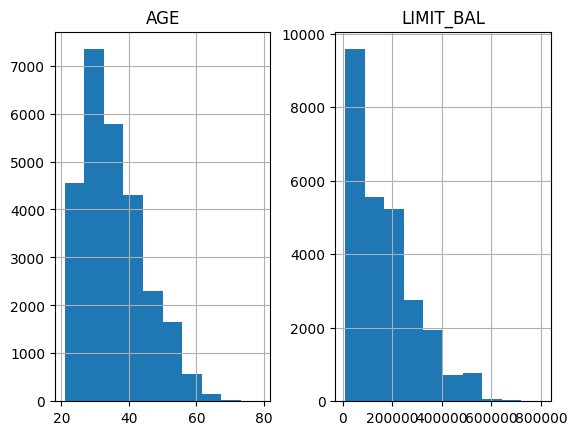

In [35]:
df_clean_2[['AGE', 'LIMIT_BAL']].hist();


### 6.3 Estatítica Descritiva de AGE e LIMIT_BAL

In [36]:
df_clean_2[['AGE', 'LIMIT_BAL']].describe()


,AGE,LIMIT_BAL
count,26664.000000,26664.000000
mean,35.505213,167919.054905
std,9.227442,129839.453081
min,21.000000,10000.000000
25%,28.000000,50000.000000
50%,34.000000,140000.000000
75%,41.000000,240000.000000
max,79.000000,800000.000000


### 6.4 Contagem de ocorrência por categoria em EDUCATION

In [37]:
df_clean_2['EDUCATION'].value_counts()


,count
EDUCATION,
2,12458
1,9412
3,4380
5,245
4,115
6,43
0,11


### 6.5 Transformar 0,5 e 6 em outros (4)

In [38]:
df_clean_2['EDUCATION'].replace(to_replace = [0,5,6], value=4, inplace=True)
df_clean_2['EDUCATION'].value_counts()

/tmp/ipython-input-3234866251.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean_2['EDUCATION'].replace(to_replace = [0,5,6], value=4, inplace=True)


,count
EDUCATION,
2,12458
1,9412
3,4380
4,414


### 6.6 Contagem de ocorrências por categoria em MARRIAGE

In [39]:
df_clean_2['MARRIAGE'].value_counts()

,count
MARRIAGE,
2,14158
1,12172
3,286
0,48


### 6.7 Transformar 0 em outros (3)

In [40]:
df_clean_2['MARRIAGE'].replace(to_replace = 0, value=3, inplace=True);
df_clean_2['MARRIAGE'].value_counts()

/tmp/ipython-input-794735533.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean_2['MARRIAGE'].replace(to_replace = 0, value=3, inplace=True);


,count
MARRIAGE,
2,14158
1,12172
3,334


### Caracteríticas Categóricas (Experimento)

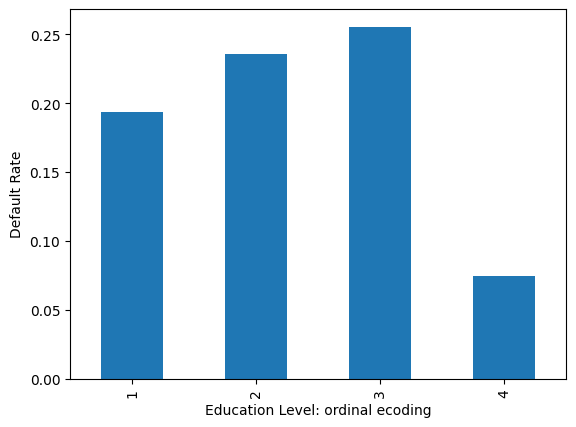

In [41]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month': 'mean'}).plot.bar(legend=False)
plt.ylabel('Default Rate')
plt.xlabel('Education Level: ordinal ecoding');
